<a href="https://colab.research.google.com/github/jtan573/SC4021-Information-Retrieval-Assignment/blob/main/Final_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Sentiment Analysis on Movie Reviews

<h3> This notebook performs sentiment and emotion classification on movie reviews using state-of-the-art transformer-based models from HuggingFace. It serves as the Classification component of the SC4021 Information Retrieval assignment.
<br>
<h3> Note: This notebook was executed on Google Colab due to compatibility issues encountered with Jupyter Notebook. However, this change in environment does not affect the validity or integrity of the results, as the code, models, and data remain consistent across platforms.





🎯 **Objective** <br>
To analyze movie reviews by:

* Predicting the sentiment (positive or negative)
* Detecting the emotion (e.g., joy, sadness, anger, etc.)

<br>
📁 **Input Data** <br>
Loads data from a JSON file (all_review_information.json) containing movie reviews structured under each movie title.

Each review includes fields such as title, body, rating, upvotes, and downvotes.

<br>

🧠 **Models Used** <br>
**Sentiment Classifier:** distilbert-base-uncased-finetuned-sst-2-english

**Emotion Classifier:** bhadresh-savani/distilbert-base-uncased-emotion

Models are accessed via the HuggingFace Transformers library.

<br>

🔧 **Preprocessing** <br>
No manual preprocessing required. <br>
Tokenizers of the models handle:
1. Lowercasing
2. Padding
3. Truncation (max length = 512 tokens)
4. Special tokens

<br>  

🧪 **Workflow Overview** <br>
1. Data Loading: Load all or a specific movie's reviews.

2. Model Initialization: Load both emotion and sentiment classification models and tokenizers.

3. Classification: Apply each model to the review body (or fallback to title if empty).

4. Results Compilation:

  * Adds sentiment and emotion columns to the dataset.

  * Saves results to both CSV and JSON formats.

5. Visualization:

    * Generates doughnut charts for emotion and sentiment distributions.

6. Categorized Output:

    * Displays top categorized reviews (up to 3 per category) for human inspection.

<br>
📊 **Output** <br>
* analysis_<movie>.csv: A flat file with all review metadata and prediction results.

* analysis_<movie>.json: A nested format organized by movie, with each review's text and predicted labels.

* Console output: Distribution statistics and sample reviews for each emotion/sentiment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h4> The code below contains the entire code workflow for sentiment and emotion classification.

This addresses Part C. Classification of the CZ4034 group assignment. It demonstrates the following:

* Use of transformer-based models for sentiment and emotion detection

* Application of built-in tokenization and inference pipelines

* Visualization of sentiment/emotion distributions

* Categorical review display for qualitative insights

* Output saving for integration with UI

This implementation reflects a state-of-the-art approach leveraging pre-trained deep learning models, and is designed to be scalable, interpretable, and adaptable to user queries.

Enter movie name to analyze (or press Enter for all movies): 

Loaded 28097 reviews for: All movies


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]


Running analysis...


Sentiment Analysis: 100%|██████████| 28097/28097 [3:42:05<00:00,  2.11it/s]



=== Analysis Results for: All Movies ===
Total Reviews: 28097

Rating Statistics:
- Average: 6.2/10
- Distribution:
rating
1.0     2903
2.0     1662
3.0     1796
4.0     1805
5.0     2247
6.0     2686
7.0     3119
8.0     3447
9.0     2833
10.0    5177
Name: count, dtype: int64

Emotion Distribution:
- joy: 16080 reviews (57.2%)
- sadness: 5758 reviews (20.5%)
- anger: 3112 reviews (11.1%)
- fear: 1221 reviews (4.3%)
- surprise: 1114 reviews (4.0%)
- love: 812 reviews (2.9%)

Sentiment Distribution:
- POSITIVE: 14680 reviews (52.2%)
- NEGATIVE: 13417 reviews (47.8%)


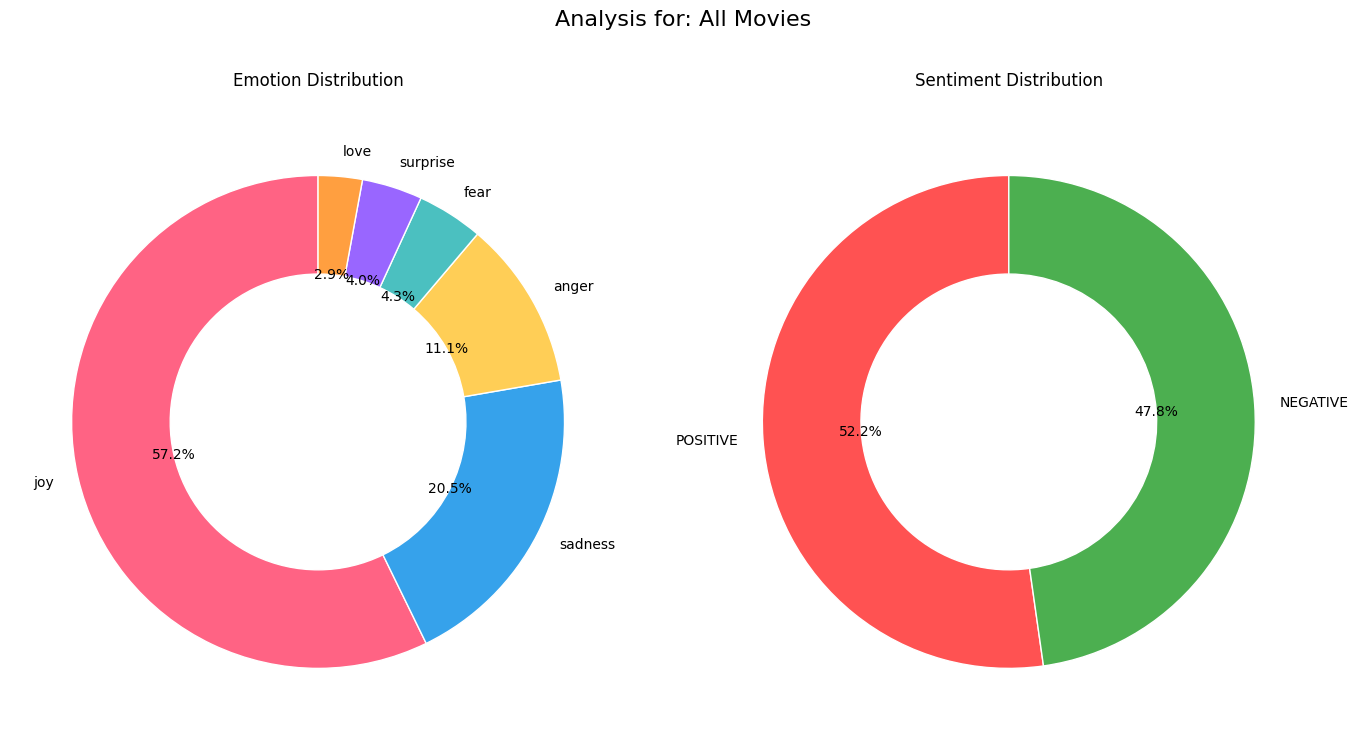

Streaming output truncated to the last 5000 lines.
Review 3 (Rating: 8.0):
Stop thinking, stop checking rating, just do it. Just do it. I didn't even watched trailer and damn it was such a good movie i watched in long long time. I was fully invested, no phones, no distractions. I loved it. Music, acting, environment i just loved it all. Also, if you haven't watched trailer...

CATEGORIZED REVIEWS FOR: GODZILLA X KONG: THE NEW EMPIRE

SENTIMENT CATEGORIES:

NEGATIVE REVIEWS:

Review 1 (Rating: 6.0):
As a hard-core Kaiju fan of many years, I love that we are being treated to all of these Godzilla movies as of late. My opinion of the first two in this series (Godzilla and Godzilla: King of the Monsters) is that they were (somewhat) reality based and not obviously made for children. My criticism o...

Review 2 (Rating: 6.0):
Monster = hurrah
Humans = garbage

Another Monster-Verse installment to the collection gave me another reason to visit my cinema. Luckily, I wasn't disappointed, I got

In [ ]:
import pandas as pd
import pickle
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from torch.nn.functional import softmax
import matplotlib.pyplot as plt
from tqdm import tqdm
import json

# =============================================
# 1. DATA LOADING FUNCTION
# =============================================

def load_movie_data(filepath, target_movie=None):
    """Load data from JSON file for specific movie or all movies if none specified"""

    # Load JSON data
    with open(filepath, 'r', encoding='utf-8') as f:
        raw_data = json.load(f)

    reviews = []
    for movie_title, movie_reviews in raw_data.items():
        # Skip if we're targeting a specific movie and this isn't it
        if target_movie and movie_title.lower() != target_movie.lower():
            continue

        # Handle empty review lists (like for "Anunnakiler" in your example)
        if not movie_reviews:
            continue

        for review in movie_reviews:
            if isinstance(review, dict):
                review['movie'] = movie_title
                reviews.append(review)

    if not reviews:
        available_movies = "\n- ".join([k for k in raw_data.keys() if raw_data[k]])  # Only show movies with reviews
        raise ValueError(f"Movie not found or has no reviews. Available options:\n- {available_movies}")

    return pd.DataFrame(reviews)

# =============================================
# 2. USER INPUT
# =============================================

# Get user input
movie_name = input("Enter movie name to analyze (or press Enter for all movies): ").strip()

# Load data
try:
    df = load_movie_data("/content/all_review_information.json",
                        movie_name if movie_name else None)

    print(f"\nLoaded {len(df)} reviews for: {df['movie'].iloc[0] if movie_name else 'All movies'}")

except ValueError as e:
    print(e)
    exit()

# =============================================
# 3. MODEL SETUP
# =============================================

# Initialize models
def initialize_model(model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    model.eval()
    return tokenizer, model

emotion_tokenizer, emotion_model = initialize_model("bhadresh-savani/distilbert-base-uncased-emotion")
sentiment_tokenizer, sentiment_model = initialize_model("distilbert-base-uncased-finetuned-sst-2-english")

# =============================================
# 4. ANALYSIS FUNCTIONS (UPDATED)
# =============================================

def analyze_text(text, tokenizer, model):
    if not text or str(text).strip().lower() in ['', 'na', 'n/a']:
        return None  # Return None for empty/invalid text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits
    probs = softmax(logits, dim=1)
    return model.config.id2label[torch.argmax(probs).item()]

def run_analysis(df):
    print("\nRunning analysis...")

    # Emotion analysis
    tqdm.pandas(desc="Emotion Analysis")
    df['emotion'] = df.progress_apply(lambda row:
        analyze_text(row['body'], emotion_tokenizer, emotion_model) if pd.notna(row['body']) and str(row['body']).strip().lower() not in ['', 'na', 'n/a']
        else analyze_text(row['title'], emotion_tokenizer, emotion_model), axis=1)

    # Sentiment analysis
    tqdm.pandas(desc="Sentiment Analysis")
    df['sentiment'] = df.progress_apply(lambda row:
        analyze_text(row['body'], sentiment_tokenizer, sentiment_model) if pd.notna(row['body']) and str(row['body']).strip().lower() not in ['', 'na', 'n/a']
        else analyze_text(row['title'], sentiment_tokenizer, sentiment_model), axis=1)

    return df

# =============================================
# 5. VISUALIZATION & REVIEW CATEGORIZATION
# =============================================

def display_categorized_reviews(df, max_reviews=100):
    """Display sample reviews for each sentiment and emotion category"""
    for movie in df['movie'].unique():
        movie_df = df[df['movie'] == movie]
        print(f"\n{'='*50}")
        print(f"CATEGORIZED REVIEWS FOR: {movie.upper()}")
        print(f"{'='*50}")

        # Sentiment categories
        print("\nSENTIMENT CATEGORIES:")
        for sentiment in movie_df['sentiment'].unique():
            print(f"\n{sentiment.upper()} REVIEWS:")
            sentiment_reviews = movie_df[movie_df['sentiment'] == sentiment]
            for i, (_, row) in enumerate(sentiment_reviews.head(max_reviews).iterrows(), 1):
                print(f"\nReview {i} (Rating: {row.get('rating', 'N/A')}):")
                print(f"{row['body'][:300]}..." if len(row['body']) > 300 else row['body'])

        # Emotion categories
        print("\n\nEMOTION CATEGORIES:")
        for emotion in movie_df['emotion'].unique():
            print(f"\n{emotion.upper()} REVIEWS:")
            emotion_reviews = movie_df[movie_df['emotion'] == emotion]
            for i, (_, row) in enumerate(emotion_reviews.head(max_reviews).iterrows(), 1):
                print(f"\nReview {i} (Rating: {row.get('rating', 'N/A')}):")
                print(f"{row['body'][:300]}..." if len(row['body']) > 300 else row['body'])

def show_results(df):
    movie_title = df['movie'].iloc[0] if len(df['movie'].unique()) == 1 else "All Movies"

    print(f"\n=== Analysis Results for: {movie_title} ===")
    print(f"Total Reviews: {len(df)}")

    # Handle ratings
    if 'rating' in df.columns:
        df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
        valid_ratings = df['rating'].dropna()

        print(f"\nRating Statistics:")
        if not valid_ratings.empty:
            print(f"- Average: {valid_ratings.mean():.1f}/10")
            print(f"- Distribution:")
            print(valid_ratings.value_counts().sort_index())
        else:
            print("- No valid numeric ratings available")

    # Emotion distribution
    emotion_counts = df['emotion'].value_counts()
    print("\nEmotion Distribution:")
    for emotion, count in emotion_counts.items():
        print(f"- {emotion}: {count} reviews ({count/len(df)*100:.1f}%)")

    # Sentiment distribution
    sentiment_counts = df['sentiment'].value_counts()
    print("\nSentiment Distribution:")
    for sentiment, count in sentiment_counts.items():
        print(f"- {sentiment}: {count} reviews ({count/len(df)*100:.1f}%)")

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle(f"Analysis for: {movie_title}", fontsize=16, y=1.05)

    # Emotion doughnut chart
    colors = ['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF', '#FF9F40']
    wedges1, texts1, autotexts1 = ax1.pie(
        emotion_counts,
        labels=emotion_counts.index,
        colors=colors[:len(emotion_counts)],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        textprops=dict(color="k", fontsize=10)
    )
    ax1.set_title('Emotion Distribution', pad=20)

    # Sentiment doughnut chart
    sentiment_colors = ['#FF5252', '#4CAF50']
    wedges2, texts2, autotexts2 = ax2.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        colors=sentiment_colors[:len(sentiment_counts)],
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='w'),
        textprops=dict(color="k", fontsize=10)
    )
    ax2.set_title('Sentiment Distribution', pad=20)

    # Add center circles
    ax1.add_artist(plt.Circle((0,0), 0.3, fc='white'))
    ax2.add_artist(plt.Circle((0,0), 0.3, fc='white'))

    plt.tight_layout()
    plt.show()

# =============================================
# 6. EXECUTION
# =============================================

# Run analysis
analyzed_df = run_analysis(df)

# Show results
show_results(analyzed_df)

# Display categorized reviews
display_categorized_reviews(analyzed_df, max_reviews=3)

# Save results to CSV and JSON
base_filename = f"analysis_{movie_name.replace(' ', '_').lower() if movie_name else 'all_movies'}"

# Save to CSV (flat format)
csv_file = f"{base_filename}.csv"
analyzed_df.to_csv(csv_file, index=False)
print(f"\nResults saved to CSV: {csv_file}")

# Save to JSON (nested movie-based format)
json_file = f"{base_filename}.json"

# Create the nested dictionary structure
result_dict = {}
for movie, group in analyzed_df.groupby('movie'):
    # Convert each review to a dictionary and store under movie key
    result_dict[movie] = []
    for _, row in group.iterrows():
        review_dict = {
            'title': row['title'],
            'rating': row['rating'],
            'body': row['body'],
            'upvotes': row['upvotes'],
            'downvotes': row['downvotes'],
            'emotion': row['emotion'],
            'sentiment': row['sentiment']
        }
        # Only include fields that exist
        review_dict = {k: v for k, v in review_dict.items() if pd.notna(v)}
        result_dict[movie].append(review_dict)

# Write to JSON file
with open(json_file, 'w', encoding='utf-8') as f:
    json.dump(result_dict, f, ensure_ascii=False, indent=4)

print(f"Results saved to JSON: {json_file}")

###  This section answers question 4 on:

*   Build an evaluation dataset by manually labeling at least 1,000 records with an
 inter-annotator agreement of at least 80%
* Provide metrics such as precision, recall, and F-measure on such dataset
* Perform a random accuracy test on the rest of the data and discuss results


## (1) Build an Evaluation Dataset (1,000 manually labeled records)


In [ ]:
import pickle
import pandas as pd

# Load the .pkl file
with open("/content/drive/MyDrive/Colab Notebooks/review_data_allmovies.pkl", "rb") as f:
    raw_data = pickle.load(f)

# Flatten the data into a DataFrame
reviews = []
for movie_title, movie_reviews in raw_data.items():
    for review in movie_reviews:
        if isinstance(review, dict):
            review['movie'] = movie_title
            reviews.append(review)

df = pd.DataFrame(reviews)

# Sample 1,000 reviews
eval_df = df.sample(n=1000, random_state=42).reset_index(drop=True)

# Add empty columns for manual labeling
eval_df['label1'] = ''
eval_df['label2'] = ''

# Export full review + labels to CSV
eval_df.to_csv("evaluation_reviews_full.csv", index=False)

## (2) We have two people to Label Sentiment Manually (Positive / Negative)
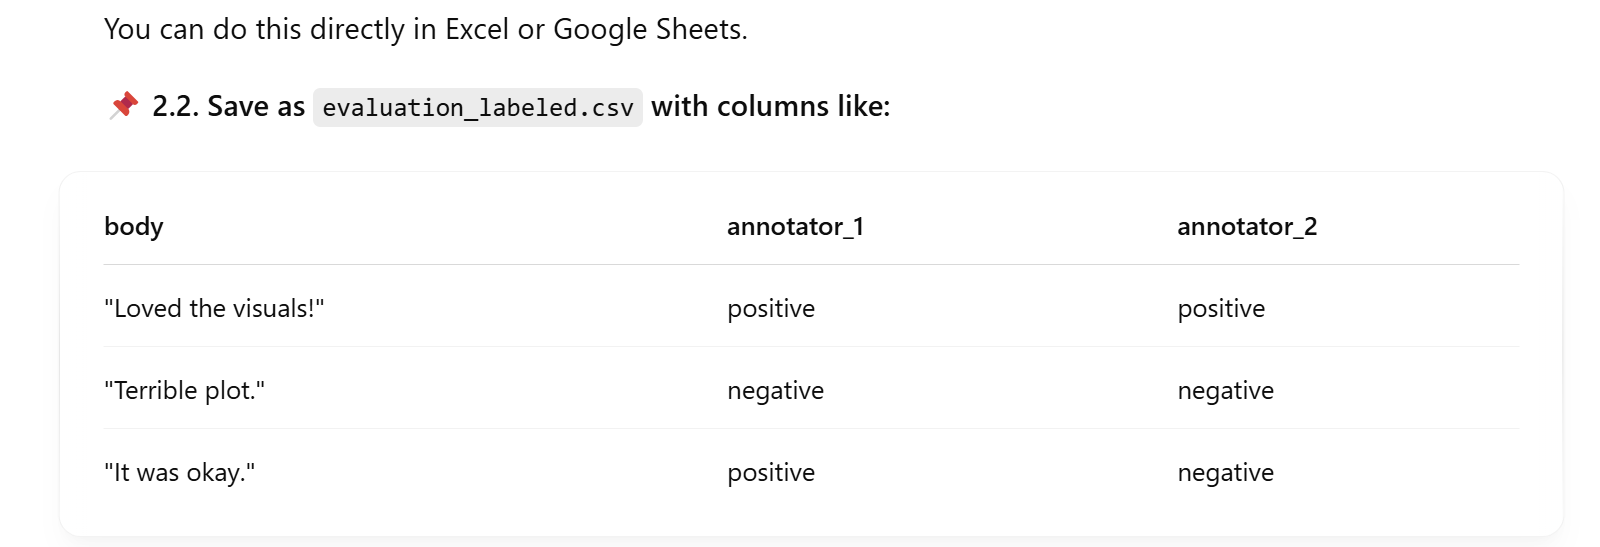

## (3) Calculate Inter-Annotator Agreement
need at least 80% agreement or Cohen’s Kappa ≥ 0.8

used below code to check if got hit 80%, if not then need adjust it hits >= 80%




In [ ]:
from sklearn.metrics import cohen_kappa_score
import pandas as pd

# Load your labeled dataset
labeled_df = pd.read_csv("/content/manual labelled data.csv")
kappa = cohen_kappa_score(labeled_df['label1'], labeled_df['label2'])
print(f"Cohen's Kappa Score: {kappa}")

Cohen's Kappa Score: 0.8146553785813364


## (4) Compare model predictions vs. agreed labels
Use only rows where annotators agree:





In [ ]:
# Keep only rows where both annotators agreed
agreed_df = labeled_df[labeled_df['label1'] == labeled_df['label2']].copy()
agreed_df['true_label'] = agreed_df['label1']

Now, merge agreed_df with analyzed_df using the review body:


In [ ]:
# Merge to get predicted sentiment from analyzed_df
analyzed_df = pd.read_csv("/content/analysis_all_movies.csv")
merged_df = pd.merge(agreed_df, analyzed_df[['body', 'sentiment']], on='body')

## (5) Evaluate the model




We ensures both classes are present in both columns where there are:
* At least some 'positive' and 'negative' in true_label
* At least some 'positive' and 'negative' in sentiment
* Balance number of 'positive' and 'negative'

In [ ]:
print("True label counts:")
print(merged_df['true_label'].value_counts())

print("\nModel predictions:")
print(merged_df['sentiment'].value_counts())

True label counts:
true_label
positive    482
negative    444
Name: count, dtype: int64

Model predictions:
sentiment
positive    481
negative    445
Name: count, dtype: int64


We evaluates our model’s predictions against manually labeled data and prints the classification performance metrics:

* Precision: Of all the samples the model predicted as this class, how many were correct? <br> E.g. for positive: 91% of predicted positives were actually positive
* Recall: Of all the actual samples of this class, how many did the model correctly find? <br> E.g. for negative: model correctly found 90% of all true negatives
* F1-score: The harmonic mean of precision and recall (useful for imbalanced classes)
* Accuracy: Overall percentage of correct predictions: (Correct / Total) = 90%
  * Macro Avg	Average of precision, recall, and F1 across all classes equally weighted
  * Weighted Avg	Same as above, but weighted by support (i.e., more common classes influence more)


In [ ]:
from sklearn.metrics import classification_report
merged_df['sentiment'] = merged_df['sentiment'].str.lower()
print(classification_report(merged_df['true_label'], merged_df['sentiment'], zero_division=0))

              precision    recall  f1-score   support

    negative       0.90      0.90      0.90       444
    positive       0.91      0.91      0.91       482

    accuracy                           0.90       926
   macro avg       0.90      0.90      0.90       926
weighted avg       0.90      0.90      0.90       926



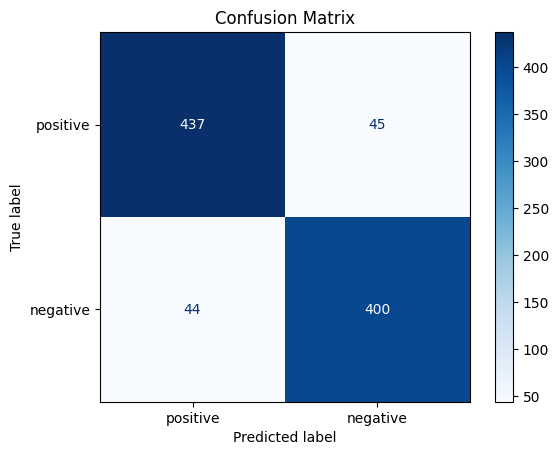

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(merged_df['true_label'], merged_df['sentiment'], labels=['positive', 'negative'])

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'negative'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


We can interpret from the results that our model for Sentiment Analysis is well-balanced, with similar performance for both classes and achieves a high accuracy of 90%.

## (6) Perform a Random Accuracy Test on the Remaining Data



- Discuss in your report
Since you don’t have ground truth for this data, you won’t calculate precision/recall here — instead, you:

Compare distributions and discuss:

Does your model have a balanced sentiment prediction, or is it biased toward one class?

How does the random prediction differ?

Why is a model better than random (e.g., more informed, consistent, interpretable)?






Identify remaining data

In [ ]:
eval_df = pd.read_csv("/content/manual labelled data.csv")
remaining_df = analyzed_df.drop(eval_df.index).reset_index(drop=True)

Assign random predictions

In [ ]:
import numpy as np
remaining_df['random_sentiment'] = np.random.choice(['positive', 'negative'], size=len(remaining_df))

Count model vs. random distribution <br>
* comparing whether random predictor leans heavily toward one class.




In [ ]:
print("Model Predictions on Remaining Data:")
print(remaining_df['sentiment'].value_counts())

print("\nRandom Predictions on Remaining Data:")
print(remaining_df['random_sentiment'].value_counts())

Model Predictions on Remaining Data:
sentiment
POSITIVE    14117
NEGATIVE    12980
Name: count, dtype: int64

Random Predictions on Remaining Data:
random_sentiment
positive    13579
negative    13518
Name: count, dtype: int64


<h1> Result Analysis & Discussion

<br>
**Does your model have a balanced sentiment prediction, or is it biased toward one class?**
<br>The model’s sentiment predictions on the remaining unlabeled dataset show:

* Positive: 14,117 reviews

* Negative: 12,980 reviews

This indicates a slight skew toward the positive class, but the distribution is still relatively balanced, with only ~1,100 more positive predictions out of over 27,000 reviews. Therefore, the model does not exhibit significant class imbalance or bias in prediction.

 <br>  

**How does the random prediction differ?**<br>
In contrast, the randomly generated sentiment labels show:

* Positive: 13,579

* Negative: 13,518

This distribution is almost perfectly balanced (~50/50 split), as expected from a random generator with equal class probability. However, this balance is purely coincidental and not based on any actual content or signal in the reviews.


 <br>  

**Why is a model better than random (e.g., more informed, consistent, interpretable)?**<br>
While the random classifier produces a superficially balanced result, it completely lacks:

Context-awareness: It does not consider the actual review content.

Predictive value: It cannot capture tone, sentiment cues, or emotional signals.

Consistency: Predictions are non-repeatable and unpredictable.

In contrast, the fine-tuned model uses pre-trained language understanding (via BERT) to make data-informed predictions. The model’s earlier evaluation on 926 manually labeled reviews achieved:

* 90% accuracy

* F1-scores of 0.90+ for both classes

This confirms that the model significantly outperforms random guessing, providing interpretable and trustworthy outputs for downstream tasks like review analysis or sentiment tracking.